# Report 4 : New York State Hospital Inpatient Data Analysis

## Introduction

This report analyzes the Hospital Inpatient Data from 2016.[Click here](https://health.data.ny.gov/api/views/gnzp-ekau/rows.csv?accessType=DOWNLOAD) to download the data as CSV file.Dataset contains the characteristic information of patients such as length of stay, total charges and Diagnosis, that were admitted into New York state hospitals in 2016. This report concentrates on analysis based on the total expenditure incurred by patients for different Diagnosis.

**Note:** In this report we will only be considering top 64 categories of Diagnosis for our analysis.

####  SPARCS :
Data is collected using SPARCS. SPARCS stands for Statewide Planning and Research Cooperative Systems. It is a data reporting system, followed by all health care providers to report patient data to the government.

## Required Packages

Since this is a CSV file. We will use read_csv() method of pandas package to read the data from the file. We will also use numpy package for various calculations and matplotlib for plotting the graph. We will use %matplotlib inline to the store the graph in the notebook itself after the code. **Necessary packages are imported below:**


In [204]:
import numpy as np
import pandas
%matplotlib inline
import matplotlib.pyplot as plt

## Reading the file

In [205]:
sparcs=pandas.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2016.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Head of the dataset :

In [206]:
sparcs.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Private Health Insurance,NaN,90335341.0,NaN,NaN,0,N,N,3913.23,3466.83
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,M,White,Not Span/Hispanic,...,NaN,NaN,90301264.0,NaN,NaN,0,N,Y,3597.10,3746.80
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Federal/State/Local/VA,NaN,90335341.0,NaN,NaN,0,N,Y,9149.22,8322.10
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Medicaid,NaN,90335341.0,NaN,NaN,0,N,Y,5880.61,5828.87
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,M,White,Not Span/Hispanic,...,NaN,NaN,90335341.0,167816.0,NaN,0,N,Y,7019.76,6604.00


#### Size of the dataset :

In [207]:
len(sparcs)

2343429

#### List of Columns :

In [208]:
for c in sparcs.columns :
    print(c)

Health Service Area
Hospital County
Operating Certificate Number
Facility Id
Facility Name
Age Group
Zip Code - 3 digits
Gender
Race
Ethnicity
Length of Stay
Type of Admission
Patient Disposition
Discharge Year
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
APR DRG Code
APR DRG Description
APR MDC Code
APR MDC Description
APR Severity of Illness Code
APR Severity of Illness Description
APR Risk of Mortality
APR Medical Surgical Description
Payment Typology 1
Payment Typology 2
Payment Typology 3
Attending Provider License Number
Operating Provider License Number
Other Provider License Number
Birth Weight
Abortion Edit Indicator
Emergency Department Indicator
Total Charges
Total Costs


For this report we will be focusing on the ' Total Charges' and 'CCS Diagnosis Description' columns of the dataset. Column 'CCS Diagnosis Description' contains the diagnosis information of the patient.

## Categorizing Diagnosis Description

To begin with, lets find unique Diagnosis and its frequency count.


In [209]:
Diag_Desc = sparcs['CCS Diagnosis Description'].value_counts()[:64]
Diag_Desc[:20]

Liveborn                                                                          224615
Septicemia (except in labor)                                                      111075
Osteoarthritis                                                                     67235
Mood disorders                                                                     54227
Alcohol-related disorders                                                          50459
Congestive heart failure; nonhypertensive                                          49675
Pneumonia (except that caused by tuberculosis or sexually transmitted disease)     45676
Other complications of birth; puerperium affecting management of mother            42987
Schizophrenia and other psychotic disorders                                        42468
Cardiac dysrhythmias                                                               42104
Chronic obstructive pulmonary disease and bronchiectasis                           39419
Skin and subcutaneous

#### Horizontal bar graph for top 20 Diagnosis Description.

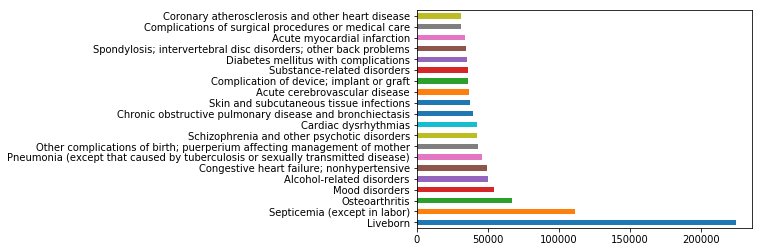

In [210]:
Diag_Desc[:20].plot(kind='barh')

We can see that in New York State, 'Liveborn'(Birth of a Child) is the most common reason for which people are admitted into hospitals. the frequency count for liveborn goes up to 225,000 which is twice as large as the frequency count of the second most recurrent diagnosis.

## Distribution of Total Charges 

Now , we will find the distribution of total charges for top 64 diagnosis. To understand the distribution of total charges according to diagnosis description first lets consider the distribution of total charges in all the patient records. We will use the following helper function histogram1d which accepts all total charges and from minimum , maximum and number of bins  finds and returns the required values of edges and counts.

#### Histogram function to get edges and counts

In [211]:
def histogram1d(xall,xmin,xmax,nbinsx=10,rawcounts=True):
        xfac = float(nbinsx)/float(xmax-xmin)
        inbox = np.logical_and(xall>=xmin,xall<xmax);
        x = xall[ inbox ]
        ix = np.array( (x-xmin)*xfac, dtype=int )
        counts = np.zeros(nbinsx,dtype=int)
        np.add.at( counts, ix, 1 )
        dx = (xmax-xmin)/float(nbinsx)
        left        = np.linspace(xmin,xmax,nbinsx+1)[:-1] 
        if rawcounts:
                return left,counts
        else:
                return left, counts/(dx*float(len(xall)))

Now lets find the overall distribution of total charges. For that we will first require minimum and maximum of the total charges.

In [212]:
sparcs['Total Charges'].min()

0.01

In [213]:
sparcs['Total Charges'].max()

10477499.5

Minimum charges turn out to be 0.01. Which may be an error in the data since it is highly impractical that someone who is admitted into hospital gets the total bill of 0.01 . Therefore we will use 100 as minimum charges.Also for this graph analysis we will use 200000 as our max value.

Text(0,0.5,' Counts ')

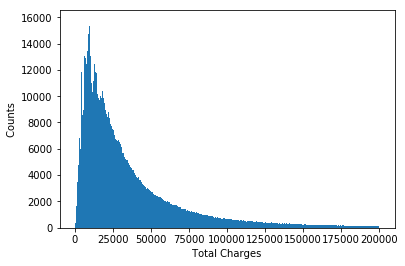

In [214]:
edges , counts = histogram1d(sparcs['Total Charges'],100,200000,1000)
w = edges[1]-edges[0]
plt.bar(edges,counts,width=w,align='edge')
plt.xlabel(' Total Charges ')
plt.ylabel(' Counts ')

We can see that most of the charges for any diagnosis are distributed between 0 and 50000. Number of charges after 50000 is constantly decreasing.There are very few patients whose total billed turned out to be more than 75000. 


#### Log distribution of Data
The data is skewed to the right. We can use log10 of the data to understand the distribution of data more appropriately.Since all data lies between 0.01 and 10477499.5 , if we take log of it, range of x-axis changes from 1 to 7.

In [215]:
np.log10(sparcs['Total Charges'].min())

-2.0

In [216]:
np.log10(sparcs['Total Charges'].max())

7.020257648780781

Text(0,0.5,' Counts')

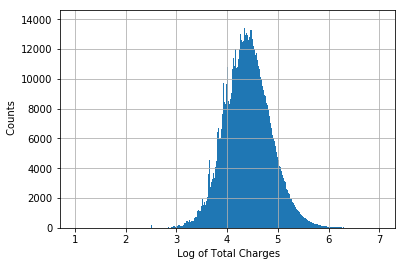

In [217]:
edges , counts = histogram1d(np.log10(sparcs['Total Charges']),1,7,1000)
w = edges[1]-edges[0]
plt.bar(edges,counts,width=w,align='edge')
plt.grid()
plt.xlabel(' Log of Total Charges')
plt.ylabel(' Counts')

From above graph we can see that all major charges lie between log(3) and log(6), which is 1000 and 1000000.Further into report we will use 3 and 6 to be the x-axis limit.

#### Gaussian distribution 

Lets find the Gaussian distribution of the data. Following function calculates and returns the Gaussian distribution from  mean and standard deviation of the dataset.

In [218]:
def gaussian(x,mu,sigma):
    return (1/np.sqrt(2*np.pi)/sigma*np.exp(-(x-mu)**2/(2*sigma**2)))

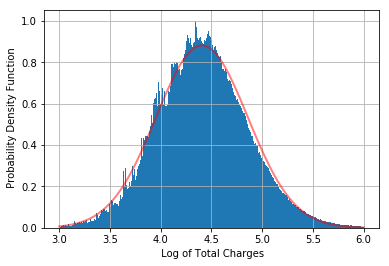

In [219]:
edges , counts = histogram1d(np.log10(sparcs['Total Charges']),3,6,500,rawcounts= False)
w = edges[1]-edges[0]

mu = np.log10( sparcs['Total Charges'] ).mean()
sigma = np.log10( sparcs['Total Charges'] ).std()
x = np.linspace(3,6,100)

plt.bar(edges,counts,width=w,align='edge')
plt.plot(x,gaussian(x,mu,sigma),'r',alpha=0.5,lw=2)

plt.grid()
plt.xlabel(' Log of Total Charges')
plt.ylabel(' Probability Density Function')
plt.show()

Plotting the Gaussian distribution we can see that some amount of charges are more common than it appears to be.Overall, all the total charges are log-normally distributed. 

Now lets take log normal of our Probability Density Function.We accomplish this by plotting the y-axis as semi-log using semilogy() function of matplotlib. Range on y-axis changes from negative infinity to 1, since log(0) is negative infinity and log(1) is 1. Also, instead of using the bar graph to plot the charges, its better to consider the top of each bar as a point and plot its curve. This will help us in better  understanding of the distribution.

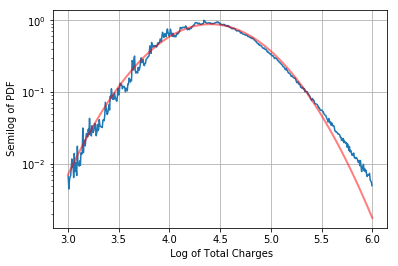

In [220]:
edges , counts = histogram1d(np.log10(sparcs['Total Charges']),3,6,500,rawcounts= False)
w = edges[1]-edges[0]

mu = np.log10( sparcs['Total Charges'] ).mean()
sigma = np.log10( sparcs['Total Charges'] ).std()
x = np.linspace(3,6,100)

plt.semilogy(edges+w/2,counts)
plt.semilogy(x,gaussian(x,mu,sigma),'r',alpha=0.5,lw=2)

plt.grid()
plt.xlabel(' Log of Total Charges')
plt.ylabel(' Semilog of PDF')
plt.show()

In the above graph we can see that number of people who has their total charges between $10^{5.5}$ and $10^6$ is more than expected.

#### Total Charge distribution for 'Liveborn'

Using all the above plots we have made some conclusion about the distribution total charge. Now lets plot total charges of patient who were admitted for 'Liveborn'.

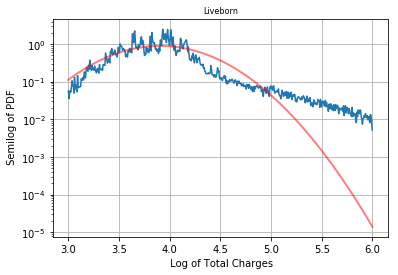

In [221]:
babies =sparcs[ sparcs['CCS Diagnosis Description']=='Liveborn' ]

edges , counts = histogram1d(np.log10(babies['Total Charges']),3,6,500,rawcounts= False)
w = edges[1]-edges[0]

mu = np.log10( babies['Total Charges'] ).mean()
sigma = np.log10( babies['Total Charges'] ).std()
x = np.linspace(3,6,100)

plt.semilogy(edges+w/2,counts)
plt.semilogy(x,gaussian(x,mu,sigma),'r',alpha=0.5,lw=2)

plt.grid()
plt.xlabel(' Log of Total Charges')
plt.ylabel(' Semilog of PDF')
plt.title('Liveborn')
plt.show()

From the above graph for distribution of total charges for 'liveborn' , we can see that the total charges are higher than expected towards the right of the graph. 

#### Total charge distribution for top 64 Diagnosis 

Now we will plot graphs for top 64 Diagnosis in the dataset. To achieve this we will use two functions plot_tot_charge() plots the graph for the name of the diagnosis that is passed as parameter and plot_all() which iterates through top 64 diagnosis and pass them to plot_tot_charge(). To visualize this data better we will plot all 64 graphs in one big graph using subplot feature provided by matplotlib in python.  

In [222]:
def plot_tot_charge(Diag_Desc,axs,posx,posy):  
    df = sparcs[  sparcs['CCS Diagnosis Description'] == Diag_Desc]
    
    mu = np.log10( df['Total Charges'] ).mean()
    sigma = np.log10( df['Total Charges'] ).std()
    x = np.linspace(3,6,100)
    
    edges,counts = histogram1d ( np.log10(df['Total Charges']),3,6,100,rawcounts= False )
    
    w = edges[1]-edges[0]
    
    axs[posx,posy].semilogy (edges+w/2,counts,'crimson',lw=2)
    axs[posx,posy].semilogy(x,gaussian(x,mu,sigma),'navy'  ,lw=2)
    axs[posx,posy].grid()
    axs[posx,posy].set_ylim(0.01,5)
    axs[posx,posy].set_title(str(Diag_Desc)[:40]) # setting the title size to 40 to avoid overlaps.

In [223]:
def plot_all():
    y,x = 0,0
    
    fig, axs = plt.subplots(8, 8 , sharex='col',sharey='row',figsize=(25, 25))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.rcParams["axes.titlesize"] = 8
    for item in Diag_Desc.index :
        plot_tot_charge(item,axs,x,y)
        y+=1
        if(y%8 == 0) :
            x+=1
            y=0
    fig.suptitle('Distribtion of Total Charges According to Diagnosis')   
    plt.show()

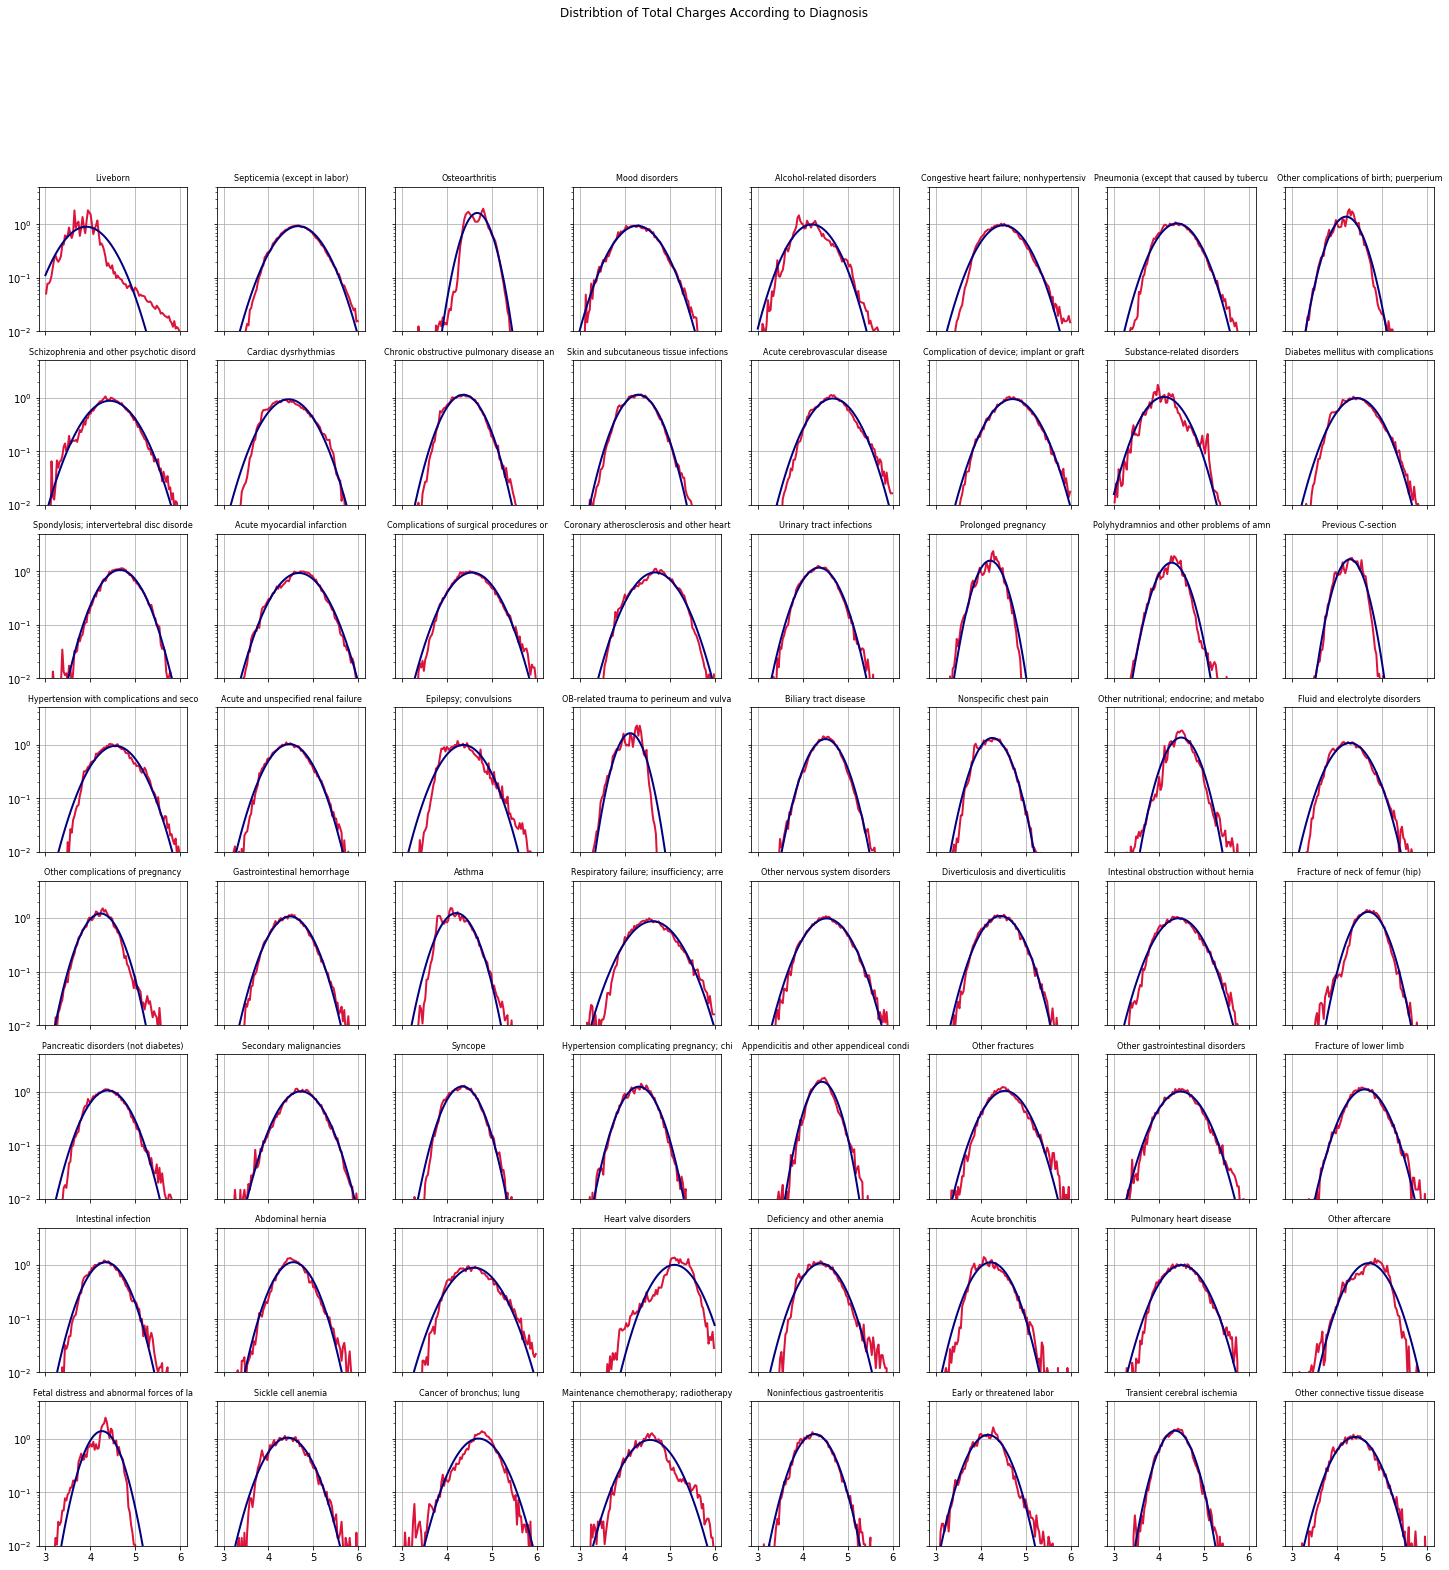

In [224]:
plot_all()

# Conclusion

* From the above graphs we can get general idea about range in which the cost of a particular diagnosis lie. Broader the base of the parabola curve, higher the range in which total charges for that Diagnosis lie. For example, patients with Previous C-section and Osteoarthritis have narrower range in which their Total Charges may lie. But Hypertension with complications and secondary hypertension and Cancer of bronchus; lung has very broader base, which implies their total charges may vary alot.

* Some diagnosis has does not have its curve on the Gaussian curve. Which suggest that the distribution of total charges for that diagnosis is different than expected distribution.For example, Liveborn has the most fluctuation in its curve.

* The curve of the Liveborn is towards left.It is because liveborn is one of the least expensive Diagnosis for which patients are admitted into Hospital. Also,towards the right tail, the curve does not follow gaussian distribution. Which suggest that Total Charges for Liveborn may be higher than expected.

* Distribution of some of the diagnosis is entirely shifted to either side of its gaussian curve.Left shift suggest that total charges are lower than expected charges and right shift suggests otherwise. For example, Epilepsy; convulsions has its curve shifted towards right,which means for Epilepsy; convulsions total charges are always higher than expected.

* Heart valve disorder is one of the most expensive diagnosis.Because its curve is towards right.

* Using above inference we made about the plots , we can individually analyze total charge distribution different diagnosis.

# Reference

http://blue.math.buffalo.edu/448/report4_f18_assignment.html

http://blue.math.buffalo.edu/448/day12_f18.html

https://matplotlib.org/examples/pylab_examples/subplots_demo.html

https://www.health.ny.gov/statistics/sparcs/

https://en.wikipedia.org/wiki/Log-normal_distribution